In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv(r'/home/erwin/Desktop/Intro to MC/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Problem 1)
* Outcome as the Dependent Variable Y 
* Other Variables as Independent Variable X

In [3]:
X1 = df.iloc[:,[0,1,2,3,4,5,6,7]] 
Y = df.iloc[:, 8].values

###### 80% training, 20% Test

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X1,Y,train_size=0.8) 

##### Feature Scaling
* Standardize 

In [5]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

##### Logistic Regression 

In [6]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, Y_train)

LogisticRegression()

###### Predictions

In [7]:
Y1_pred = classifier.predict(X_test)
Y1_pred[0:5]

array([0, 0, 1, 1, 1])

In [8]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(Y_test, Y1_pred)

### Accuracy, Precision, Recall Problem 1
* Question 1: Results for Accuracy, Precision, and Recall

In [9]:
from sklearn import metrics
# Accuracy of model 
print("Accuracy: ", metrics.accuracy_score(Y_test,Y1_pred))
# Precision of model
print("Precision:", metrics.precision_score(Y_test,Y1_pred))
# Precision of model
print("Recall:", metrics.recall_score(Y_test,Y1_pred))

Accuracy:  0.7922077922077922
Precision: 0.6976744186046512
Recall: 0.6122448979591837


### Confusion Matrix Problem 1

Text(0.5, 257.44, 'Predicted label')

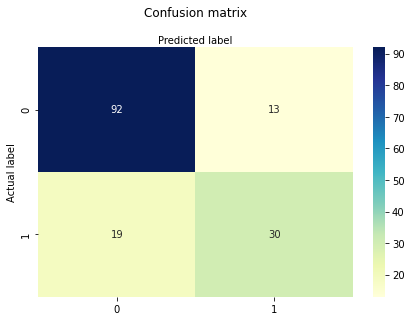

In [10]:
import seaborn as sns
class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# Heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Problem 2
* GaussianNB 

In [11]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, Y_train)

GaussianNB()

In [12]:
Y2_pred = classifier.predict(X_test)

In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score
cnf_matrix = confusion_matrix(Y_test, Y2_pred)

### Accuracy, Precision, Recall Problem 2
* Question 1: Results for Accuracy, Precision, and Recall

In [14]:
from sklearn import metrics
# Accuracy of model 
print("Accuracy: ", metrics.accuracy_score(Y_test,Y2_pred))
# Precision of model
print("Precision:", metrics.precision_score(Y_test,Y2_pred))
# Precision of model
print("Recall:", metrics.recall_score(Y_test,Y2_pred))

Accuracy:  0.7987012987012987
Precision: 0.6956521739130435
Recall: 0.6530612244897959


## Confusion Matrix Problem 2 

Text(0.5, 257.44, 'Predicted label')

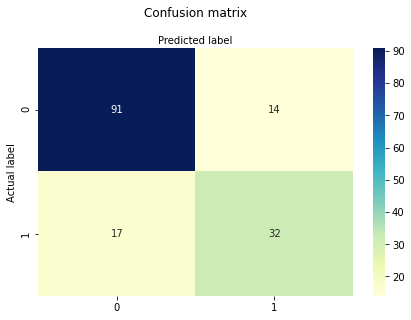

In [15]:
import seaborn as sns
class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# Heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

####  When comparing the results for problem 1 & 2 they yeld similar results in both the confusion matrix and accuracy

# Problem 3
##### K-fold cross-validation for Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, Y_train)

LogisticRegression()

##### K-5

from sklearn.model_selection import cross_val_score 
scores = cross_val_score(classifier, X_train, Y_train,cv = 5)
print(np.mean(scores))

##### K-10

In [18]:
scores = cross_val_score(classifier, X_train, Y_train, cv = 10)
print(np.mean(scores))

0.7653886832363829


The K-folds gives the you the accuracy of the model for each k-fold. In this case there was little between the k-fold evaluation and the accuracy from problem 1 are simiar  

# Problem 4

In [19]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, Y_train)

GaussianNB()

In [20]:
from sklearn.model_selection import cross_val_score 
scores = cross_val_score(classifier, X_train, Y_train,cv = 5)
print(np.mean(scores))

0.7378248700519792


In [21]:
scores = cross_val_score(classifier, X_train, Y_train, cv = 10)
print(np.mean(scores))

0.742622950819672


Since Naive Bayes uses probability and no actual training, it makes no since to use K-folds  